## T-Test

### 1-Sample T-Test
- 학생들의 평균키가 175인지 검정 (Null Hypothesis : 학생들의 평균키는 175이다.)

In [41]:
import numpy as np
from scipy import stats
 
np.random.seed(1)
 
heights= [180 + np.random.normal(0,5) for _ in range(100)]
heights[:10]

[188.1217268183162,
 176.94121793174963,
 177.35914123868272,
 174.63515688921916,
 184.32703814662338,
 168.49230651559859,
 188.7240588210824,
 176.19396549552448,
 181.5951954802855,
 178.75314812261294]

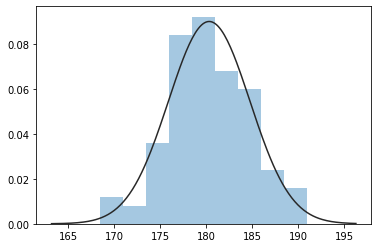

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(heights, kde=False, fit=stats.norm);

In [43]:
# heights : 표본 데이터 배열
# 175 : Null hypothesis(귀무가설)의 기댓값
tTestResult= stats.ttest_1samp(heights,175)
tTestResult

Ttest_1sampResult(statistic=11.921812187908435, pvalue=7.54055148707292e-21)

In [44]:
if tTestResult.pvalue < 0.05:
    print('평균키는 175가 아니다.')
else:
    print('평균키는 175이다.')

평균키는 175가 아니다.


In [45]:
import numpy as np
np.mean(heights) 

180.3029142603785

### Unpaired T-test
 - 두 그룹의 평균키가 동일한지 검정(Null Hypothesis : 두 그룹의 평균키는 같다.)

In [46]:
np.random.seed(1)
group1Heights= [170 + np.random.normal(0,5) for _ in range(100)]
group2Heights= [175 + np.random.normal(0,10) for _ in range(100)]

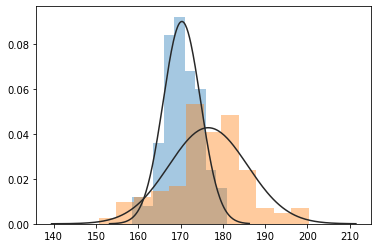

In [47]:
sns.distplot(group1Heights, kde=False, fit=stats.norm)
sns.distplot(group2Heights, kde=False, fit=stats.norm)

In [48]:
tTestResult= stats.ttest_ind(group1Heights, group2Heights)
tTestResult

Ttest_indResult(statistic=-6.003279385437336, pvalue=9.085643333970693e-09)

In [49]:
if tTestResult.pvalue < 0.05:
    print('두 그룹의 평균키가 다르다.')
else:
    print('두 그룹의 평균키가 같다.')

두 그룹의 평균키가 다르다.


In [50]:
tTestResult1 = stats.ttest_ind(group1Heights, group2Heights, equal_var=False)
print('두 그룹간의 분산이 같다고 가정할 때 p-value : %.20f' % tTestResult.pvalue)
print('두 그룹간의 분산이 다르다고 가정할 때 p-value : %.20f' % tTestResult1.pvalue)

두 그룹간의 분산이 같다고 가정할 때 p-value : 0.00000000908564333397
두 그룹간의 분산이 다르다고 가정할 때 p-value : 0.00000001546545979755


### Paired T-test

-  하나의 그룹에 대한 전, 후 체중의 평균이 동일한지 검정(Null Hypothesis : 전, 후 체중의 평균은 같다.)

In [51]:
np.random.seed(1)
 
beforeWeights= [60 + np.random.normal(0,5) for _ in range(20)]
afterWeights= [w * np.random.normal(0.99,0.02) for w in beforeWeights]

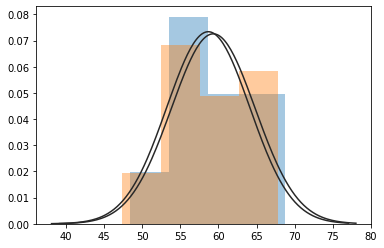

In [52]:
sns.distplot(beforeWeights, kde=False, fit=stats.norm)
sns.distplot(afterWeights, kde=False, fit=stats.norm)

In [53]:
tTestResult= stats.ttest_rel(beforeWeights, afterWeights)
 
if tTestResult.pvalue < 0.05:
    print('다이어트 전,후의 체중이 다르다.')
else:
    print('다이어트 전,후의 체중이 같다')

다이어트 전,후의 체중이 다르다.


## ANOVA-Test

### 분산의 차이에 따른 데이터의 차이 

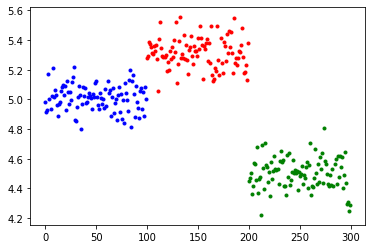

In [54]:
centers = [5,5.3,4.5]  # 평균
std = 0.1  # 분산
colors = 'brg'

data1 = []
for i in range(3):
    data1.append(stats.norm(centers[i], std).rvs(100)) 
    plt.plot(np.arange(len(data1[i]))+i*len(data1[0]), data1[i], '.', color = colors[i])

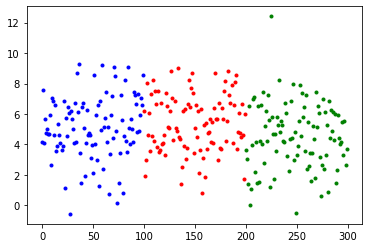

In [55]:
std = 2  # 분산

data2 = []
for i in range(3):
    data2.append(stats.norm(centers[i], std).rvs(100)) 
    plt.plot(np.arange(len(data2[i]))+i*len(data2[0]), data2[i], '.', color = colors[i])

#### - 분산이 클수록 그룹간의 평균값의 차이는 무의미


### 일원분산분석(One-way ANOVA)
- 종속변인은 1개이며, 독립변인의 집단도 1개인 경우입니다. 한가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용

In [56]:
import pandas as pd

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = pd.read_csv(url)
data.columns = ['value', 'group']
data.head()

,value,group
0,251,1
1,275,1
2,291,1
3,347,1
4,354,1


### 22명의 심장 우회 수술을 받은 환자 데이터

- Group I: 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
- Group II: 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
- Group III: 아산화 질소 없이 오직 35-50%의 산소만 24시간동안 처리한 환자

#### 그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정

In [57]:
group1 = data.query('group == 1')['value']
group2 = data.query('group == 2')['value']
group3 = data.query('group == 3')['value']

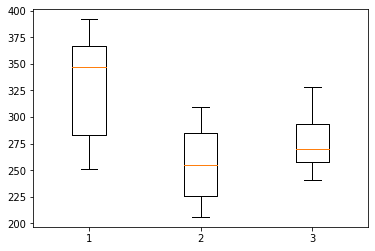

In [58]:
ax = plt.boxplot([group1, group2, group3])

In [59]:
# Scipy 사용 
f_stat, pVal = stats.f_oneway(group1, group2, group3)
print(f_stat)
print(pVal)

5.3739149211015285
0.01479132076930809


In [60]:
if pVal < 0.05:
    print('그룹의 평균값이 통계적으로 유의미하게 차이가 난다.')

그룹의 평균값이 통계적으로 유의미하게 차이가 난다.


In [61]:
# statsmodel 사용
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# the "C" indicates categorical data
model = ols('value ~ C(group)', data).fit()

print(anova_lm(model))

            df        sum_sq       mean_sq         F    PR(>F)
C(group)   2.0  20015.492063  10007.746032  5.373915  0.014791
Residual  18.0  33521.079365   1862.282187       NaN       NaN


### 이원분산분석(Two-way ANOVA)

- 독립변인의 수가 두 개 이상일 때 집단 간 차이가 유의한지를 검증하는 데 사용
- 상호작용효과(Interaction effect), 한 변수의 변화가 결과에 미치는 영향이 다른 변수의 수준에 따라 달라지는지를 확인하기 위해 사용

In [62]:
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_12_6.txt'
data = pd.read_csv(url)
data.columns = ['head_size', 'fetus', 'observer']  # 머리 둘레, 태아, 관측자

data.head()

,head_size,fetus,observer
0,14.0,1,1
1,14.8,1,1
2,13.6,1,2
3,13.6,1,2
4,13.8,1,2


- 태아의 머리 둘레 측정 데이터
- 4명의 관측자가 3명의 태아를 대상으로 측정
- 초음파로 태아의 머리 둘레측정 데이터가 재현성이 있는지를 조사

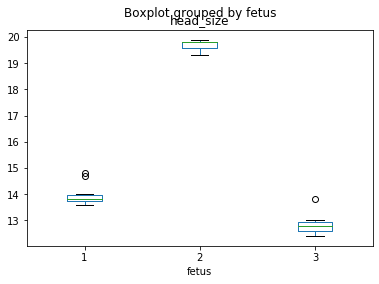

In [63]:
data.boxplot(column = 'head_size', by='fetus' , grid = False);

In [64]:
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, data).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  322.624593  161.312297  2023.736084  1.409143e-26
C(observer)            3.0    1.119936    0.373312     4.683369  1.073864e-02
C(fetus):C(observer)   6.0    0.543852    0.090642     1.137145  3.727071e-01
Residual              23.0    1.833333    0.079710          NaN           NaN


## Chisqure-Test

### 그룹간 비율에 따른 차이 검정

In [93]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [94]:
df = titanic.loc[:,['survived','class','sex','age','sibsp','parch','embarked']]
df.dropna(inplace=True)

In [95]:
agesplit = [0,10,18,25,40,90]
agestatus = ['Adolescent','Teenager','Young Adult','Adult','Elder']

df['agegroup']=pd.cut(df.age, agesplit, labels=agestatus)
df = df.drop(columns=['age'])

In [96]:
df.head()

,survived,class,sex,sibsp,parch,embarked,agegroup
0,0,Third,male,1,0,S,Young Adult
1,1,First,female,1,0,C,Adult
2,1,Third,female,0,0,S,Adult
3,1,First,female,1,0,S,Adult
4,0,Third,male,0,0,S,Adult


In [100]:
ct = pd.crosstab(index=df.survived, columns = [df['class'], df['sex'], df['agegroup']],margins=True)
ct

class         First                                                       \
sex          female                                        male            
agegroup Adolescent Teenager Young Adult Adult Elder Adolescent Teenager   
survived                                                                   
0                 1        0           1     0     1          0        1   
1                 0       10          16    30    24          2        2   
All               1       10          17    30    25          2        3   

class                             ...    Third                          \
sex                               ...   female                           
agegroup Young Adult Adult Elder  ... Teenager Young Adult Adult Elder   
survived                          ...                                    
0                  6    18    36  ...       10          11    15     8   
1                  3    19    14  ...       11          11    13     1   
All                9    37    50  ...       21          22    28     9   

class                                                 All  
sex            male                                        
agegroup Adolescent Teenager Young Adult Adult Elder       
survived                                                   
0                14       26          69    77    29  424  
1                 8        3           9    16     2  288  
All              22       29          78    93    31  712  

[3 rows x 31 columns]

In [101]:
agect = pd.crosstab(index=df.survived, columns = [df['agegroup']], margins=True)
agect

agegroup,Adolescent,Teenager,Young Adult,Adult,Elder,All
survived,,,,,,
0,26,43,108,152,95,424
1,38,32,54,110,54,288
All,64,75,162,262,149,712


In [102]:

chi2_stat, p_val, dof, ex = stats.chi2_contingency(agect)
print("===Chi2 Stat===")
print(chi2_stat)
print("\n")
print("===Degrees of Freedom===")
print(dof)
print("\n")
print("===P-Value===")
print(p_val)
print("\n")
print("===Contingency Table===")
print(ex)

===Chi2 Stat===
14.426877715419394


===Degrees of Freedom===
10


===P-Value===
0.15439549843773454


===Contingency Table===
[[ 38.11235955  44.66292135  96.47191011 156.02247191  88.73033708
  424.        ]
 [ 25.88764045  30.33707865  65.52808989 105.97752809  60.26966292
  288.        ]
 [ 64.          75.         162.         262.         149.
  712.        ]]
